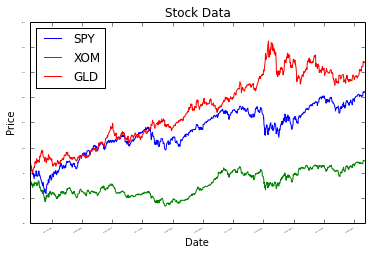

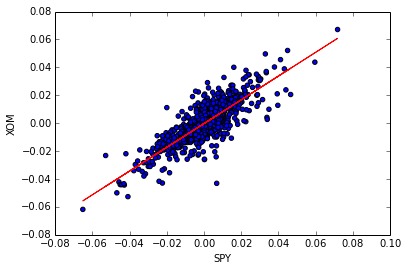

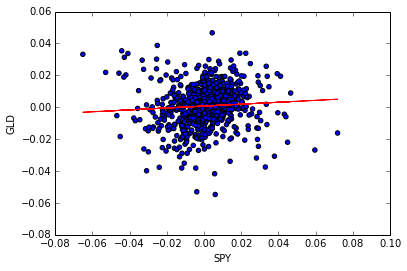

beta_XOM= 0.850746223673
alpha_XOM= -0.00024686727668
beta_GLD= 0.0597611348322
alpha_GLD= 0.00074788111616
          SPY       XOM       GLD
SPY  1.000000  0.820241  0.067324
XOM  0.820241  1.000000  0.069687
GLD  0.067324  0.069687  1.000000


In [63]:
"""Scatterplots"""
import numpy as np
def test_run():
    # Read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM', 'GLD']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    
    # Scatterplot SPY vs XOM
    daily_returns.plot(kind='scatter', x='SPY', y='XOM')
    beta_XOM, alpha_XOM = np.polyfit(daily_returns['SPY'], daily_returns['XOM'], 1)
    plt.plot(daily_returns['SPY'], beta_XOM*daily_returns['SPY'] + alpha_XOM, '-', color='r')
    plt.show()
    
    # Scatterplot SPY vs GLD
    daily_returns.plot(kind='scatter', x='SPY', y='GLD')
    beta_GLD, alpha_GLD = np.polyfit(daily_returns['SPY'], daily_returns['GLD'], 1)
    plt.plot(daily_returns['SPY'], beta_GLD*daily_returns['SPY'] + alpha_GLD, '-', color='r')
    plt.show()
    
    print "beta_XOM=", beta_XOM
    print "alpha_XOM=", alpha_XOM
    print "beta_GLD=", beta_GLD
    print "alpha_GLD=", alpha_GLD
    
    # Calculate correlation coefficient
    print daily_returns.corr(method='pearson')
    
test_run()

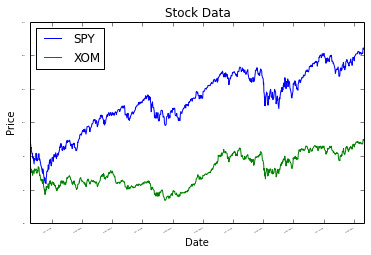

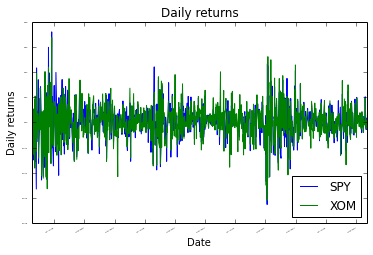

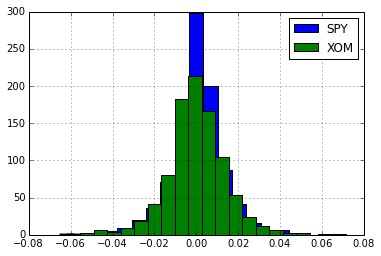

In [49]:
"""Plot two histograms together"""
def test_run():
    # Read data
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY', 'XOM']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    # Plot historgram directly from dataframe
    daily_returns['SPY'].hist(bins=20,label='SPY')
    daily_returns['XOM'].hist(bins=20,label='XOM')
    plt.legend(loc='upper right')
    plt.show()

test_run()

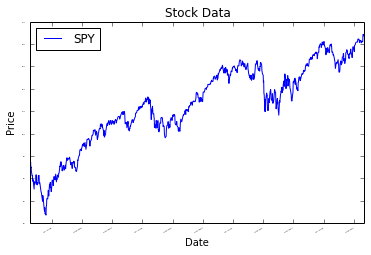

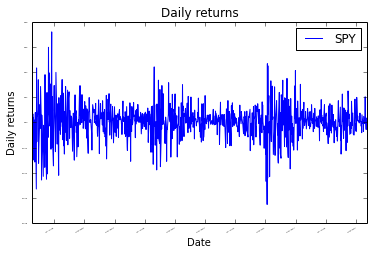

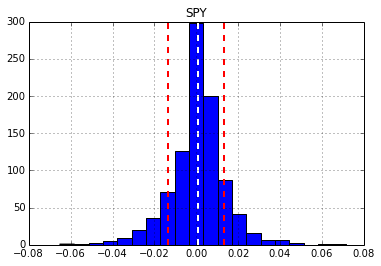

mean= 0.000635578332225
std= 0.0133704908994
SPY    3.220278
dtype: float64


In [42]:
def test_run():
    dates = pd.date_range('2009-01-01', '2012-12-31')
    symbols = ['SPY']
    df = get_data(symbols, dates)
    plot_data(df)
    
    # compute daily returns
    daily_returns = compute_daily_returns(df)
    plot_data(daily_returns, title="Daily returns", ylabel = "Daily returns")
    
    daily_returns.hist(bins=20)
    
    # Get mean and standard deviation
    mean = daily_returns['SPY'].mean()
    std = daily_returns['SPY'].std()
    
    plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
    plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)
    plt.show()
    
    print "mean=", mean
    print "std=",std
    print daily_returns.kurtosis()
    
test_run()

In [29]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    daily_returns = df.copy()
    daily_returns[1:] = (df[1:] / df[:-1].values) - 1
    daily_returns.ix[0,:] = 0
    return daily_returns

In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from util import get_data, plot_data

In [33]:
def fill_missing_values(df_data):
    """Fill missing values in data frame, in place."""
    df_data.fillna(method="ffill", inplace="TRUE")
    df_data.fillna(method="bfill", inplace="TRUE")


def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df_final = pd.DataFrame(index=dates)
    if "SPY" not in symbols:  # add SPY for reference, if absent
        symbols.insert(0, "SPY")

    for symbol in symbols:
        file_path = symbol_to_path(symbol)
        df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
        df_temp = df_temp.rename(columns={"Adj Close": symbol})
        df_final = df_final.join(df_temp)
        if symbol == "SPY":  # drop dates SPY did not trade
            df_final = df_final.dropna(subset=["SPY"])

    return df_final


def plot_data(df_data, title="Stock Data", ylabel="Price", xlabel="Date"):
    """Plot stock data with appropriate axis labels."""
    ax = df_data.plot(title=title, fontsize=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()
